In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
sns.set(rc={'figure.figsize':(10,6)})

In [4]:
def find_outliers_IQR(df):
    
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

# EXP 5 main lab

In [5]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_5_main_lab'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp5lab = pd.read_csv(url)

In [6]:
exp5lab

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,TEMP,TIME,DEAD,FERT,...,FERT_PERC,SHOCK_DEAD,SHOCK_ALIVE,SHOCK_NAME,HATCHED_DEAD,HATCHED_ALIVE,HATCHED_NAME,SWIM,SWIM_NAME,SWIM_PERC
0,1,11CC,1,1,1,C,C,NaN,5,37,...,"88,0952381",0,37,Polina,0,37,Sasha,33,Vika,"89,18918919"
1,2,11CC,2,1,1,C,C,NaN,2,42,...,"95,45454545",0,41,Polina,1,40,Sasha,33,Vika,"78,57142857"
2,3,11CC,3,1,1,C,C,NaN,5,33,...,"86,84210526",0,31,Polina,2,29,Sasha,26,Vika,"78,78787879"
3,4,11CC,4,1,1,C,C,NaN,11,38,...,"77,55102041",0,37,Polina,2,35,Sasha,32,Vika,"84,21052632"
4,5,12CC,1,1,2,C,C,NaN,4,58,...,"93,5483871",0,59,Lera,10,49,Vika,45,Polina,"77,5862069"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,21M38,4,2,1,M,38,40.0,3,54,...,"94,73684211",0,53,Alya(d)+Lera(a),3,50,Vika,33,Vika,"61,11111111"
60,61,22M38,1,2,2,M,38,40.0,2,40,...,"95,23809524",0,40,Lera,4,36,Vika,34,Polina,85
61,62,22M38,2,2,2,M,38,40.0,2,43,...,"95,55555556",1,40,Lera,4,36,Vika,35,Polina,"81,39534884"
62,63,22M38,3,2,2,M,38,40.0,0,58,...,100,0,55,Lera,1,54,Vika,50,Polina,"86,20689655"


In [7]:
exp5lab.FEMALE = exp5lab.FEMALE.astype(str)
exp5lab.MALE = exp5lab.MALE.astype(str)
exp5lab.TEMP = exp5lab.TEMP.astype(str)

exp5lab.FERT_PERC = exp5lab.FERT_PERC.str.replace(',', '.')
exp5lab.FERT_PERC = pd.to_numeric(exp5lab.FERT_PERC)

exp5lab.SWIM_PERC = exp5lab.SWIM_PERC.str.replace(',', '.')
exp5lab.SWIM_PERC = pd.to_numeric(exp5lab.SWIM_PERC)

In [8]:
exp5lab['FAMILY'] = exp5lab.FEMALE + exp5lab.MALE
exp5lab['CODE_COND'] = exp5lab.MUT + exp5lab.TEMP

### FIND OUTLIERS

In [9]:
find_outliers_IQR(exp5lab['FERT'])

56    85
Name: FERT, dtype: int64

In [10]:
find_outliers_IQR(exp5lab['FERT_PERC'])

3     77.551020
41    76.923077
Name: FERT_PERC, dtype: float64

In [11]:
find_outliers_IQR(exp5lab['HATCHED_ALIVE'])

56    71
Name: HATCHED_ALIVE, dtype: int64

In [12]:
find_outliers_IQR(exp5lab['SWIM'])

Series([], Name: SWIM, dtype: int64)

In [13]:
find_outliers_IQR(exp5lab['SWIM_PERC'])

Series([], Name: SWIM_PERC, dtype: float64)

<AxesSubplot: >

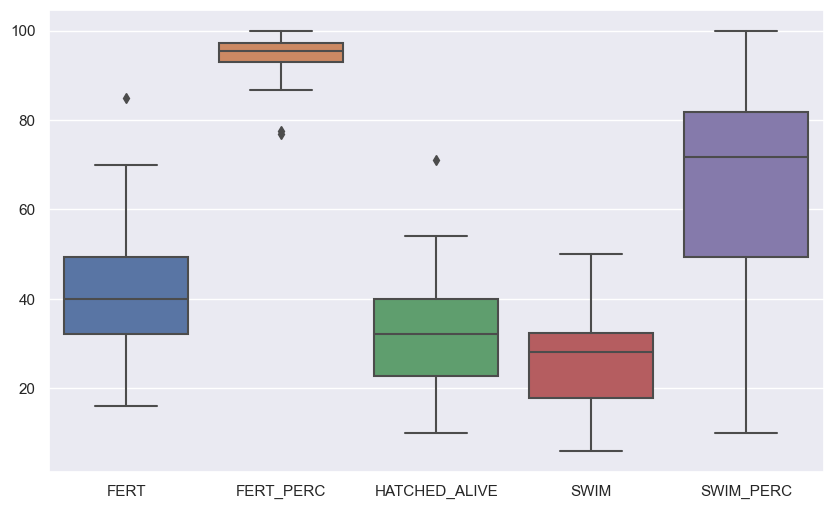

In [14]:
sns.boxplot(exp5lab[['FERT', 'FERT_PERC', 'HATCHED_ALIVE', 'SWIM', 'SWIM_PERC']])

### DRAW PLOT

In [15]:
st.normaltest(exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC)

ValueError: skewtest is not valid with less than 8 samples; 4 samples were given.

In [60]:
exp_11 = exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.mean() / 100
exp_12 = exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.mean() / 100
exp_21 = exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.mean() / 100
exp_22 = exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.mean() / 100

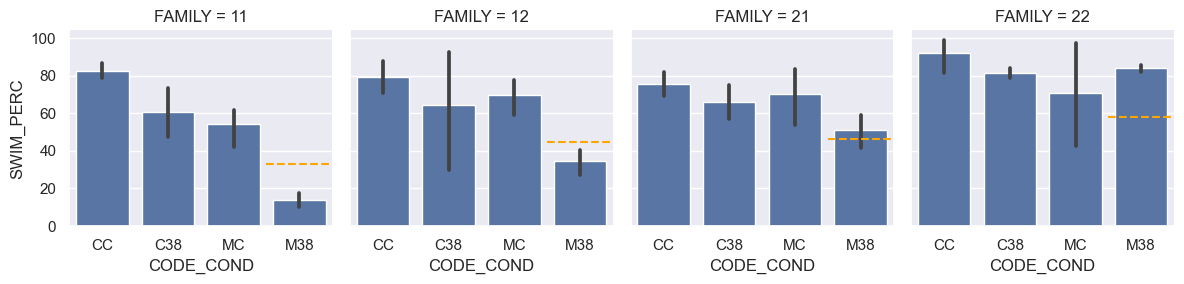

In [61]:
g = sns.FacetGrid(exp5lab, col="FAMILY")
g.map(sns.barplot, 'CODE_COND', 'SWIM_PERC', order=['CC', 'C38', 'MC', 'M38'])

ax1, ax2, ax3, ax4 = g.axes[0]
ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22, xmin=0.75, ls='--', color='orange');

In [66]:
print('11C38:', exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.median())
print('11MC:', exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.median())
print('12C38:', exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.median())
print('12MC:', exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.median())
print('21C38:', exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.median())
print('21MC:', exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.median())
print('22C38:', exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.median())
print('22MC:', exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.median())

11C38: 60.639719202500004 60.885416665
11MC: 54.2366120975 57.37028302
12C38: 64.58764367750001 71.41666666500001
12MC: 69.675925925 72.685185185
21C38: 65.815295815 63.85281385
21MC: 70.1573185075 72.72004242
22C38: 81.35541925749999 81.334149325
22MC: 71.10805861 71.97802198000001


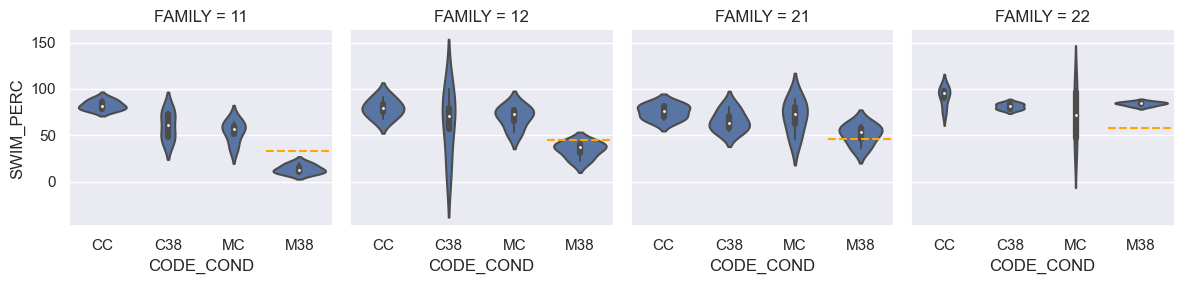

In [62]:
g = sns.FacetGrid(exp5lab, col="FAMILY")
g.map(sns.violinplot, 'CODE_COND', 'SWIM_PERC', order=['CC', 'C38', 'MC', 'M38'])

ax1, ax2, ax3, ax4 = g.axes[0]
ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22, xmin=0.75, ls='--', color='orange');

# EXP 5 main factory

In [18]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_5_main_factory'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp5fac = pd.read_csv(url)

In [19]:
exp5fac

,№,CODE,FEMALE,MALE,MUT,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,TOTAL_SAMPLE,FERT.1,FERT_PERC,SWIM_PERC_FERT,SWIM_PERC_TOTAL,SWIM,SWIM_PERC_FERT_NORM
0,1,11CC,1,1,C,C,NaN,38,239,Lera,49203,277,42453,"86,28158845","2,827","2,439",1200,100
1,5,11MC,1,1,M,C,NaN,24,279,Lera,49203,303,45306,"92,07920792","0,278","0,256",126,"9,83888436"
2,9,11C38,1,1,C,38,40.0,38,239,Lera,49203,277,42453,"86,28158845","0,641","0,553",272,"22,66666667"
3,13,11M38,1,1,M,38,40.0,24,279,Lera,49203,303,45306,"92,07920792","0,022","0,020",10,"0,7808638381"
4,3,21CC,2,1,C,C,NaN,21,275,Lera,66528,296,61808,"92,90540541","3,721","3,457",2300,100
5,7,21MC,2,1,M,C,NaN,41,263,Lera,66528,304,57555,"86,51315789","0,047","0,041",27,"1,260650632"
6,11,21C38,2,1,C,38,40.0,21,275,Lera,66528,296,61808,"92,90540541","0,235","0,218",145,"6,304347826"
7,15,21M38,2,1,M,38,40.0,41,263,Lera,66528,304,57555,"86,51315789","0,205","0,177",118,"5,509510171"
8,2,12CC,1,2,C,C,NaN,31,284,Lera,48510,315,43736,"90,15873016","13,719","12,369",6000,100
9,6,12MC,1,2,M,C,NaN,144,189,Lera,49203,333,27926,"56,75675676","0,039","0,022",11,"0,2871252205"


In [20]:
exp5fac.FEMALE = exp5fac.FEMALE.astype(str)
exp5fac.MALE = exp5fac.MALE.astype(str)
exp5fac.TEMP = exp5fac.TEMP.astype(str)

exp5fac.FERT_PERC = exp5fac.FERT_PERC.str.replace(',', '.')
exp5fac.FERT_PERC = pd.to_numeric(exp5fac.FERT_PERC)

exp5fac.SWIM_PERC_FERT = exp5fac.SWIM_PERC_FERT.str.replace(',', '.')
exp5fac.SWIM_PERC_FERT = pd.to_numeric(exp5fac.SWIM_PERC_FERT)

exp5fac.SWIM_PERC_FERT_NORM = exp5fac.SWIM_PERC_FERT_NORM.str.replace(',', '.')
exp5fac.SWIM_PERC_FERT_NORM = pd.to_numeric(exp5fac.SWIM_PERC_FERT_NORM)

In [21]:
exp5fac['FAMILY'] = exp5fac.FEMALE + exp5fac.MALE
exp5fac['CODE_COND'] = exp5fac.MUT + exp5fac.TEMP

### FIND OUTLIERS

In [22]:
find_outliers_IQR(exp5fac['FERT.1'])

Series([], Name: FERT.1, dtype: int64)

In [23]:
find_outliers_IQR(exp5fac['FERT_PERC'])

9     56.756757
11    56.756757
Name: FERT_PERC, dtype: float64

In [24]:
find_outliers_IQR(exp5fac['SWIM'])

4     2300
8     6000
13    2000
Name: SWIM, dtype: int64

In [25]:
find_outliers_IQR(exp5fac['SWIM_PERC_FERT'])

4      3.721
8     13.719
13     3.250
Name: SWIM_PERC_FERT, dtype: float64

<AxesSubplot: >

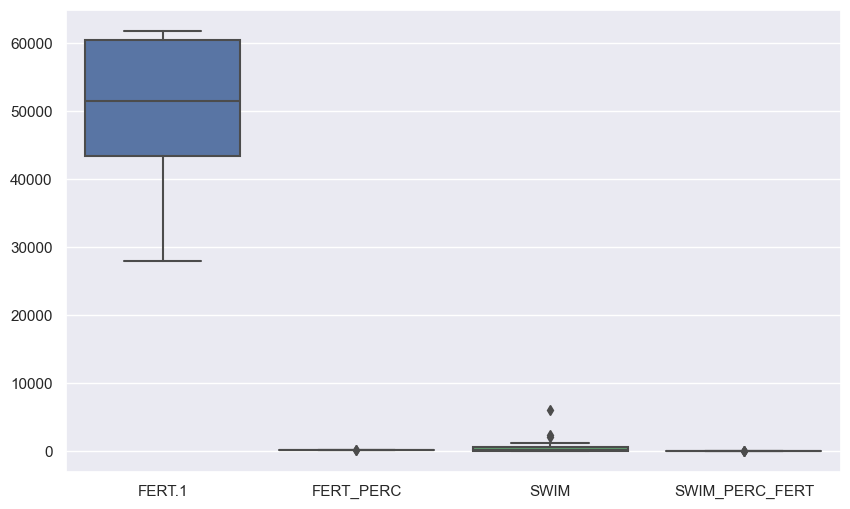

In [26]:
sns.boxplot(exp5fac[['FERT.1', 'FERT_PERC', 'SWIM', 'SWIM_PERC_FERT']])

### DRAW PLOT

In [27]:
exp_11 = exp5fac[exp5fac['CODE'] == '11C38'].SWIM_PERC_FERT_NORM.mean() * exp5fac[exp5fac['CODE'] == '11MC'].SWIM_PERC_FERT_NORM.mean() / 100
exp_21 = exp5fac[exp5fac['CODE'] == '21C38'].SWIM_PERC_FERT_NORM.mean() * exp5fac[exp5fac['CODE'] == '21MC'].SWIM_PERC_FERT_NORM.mean() / 100

''

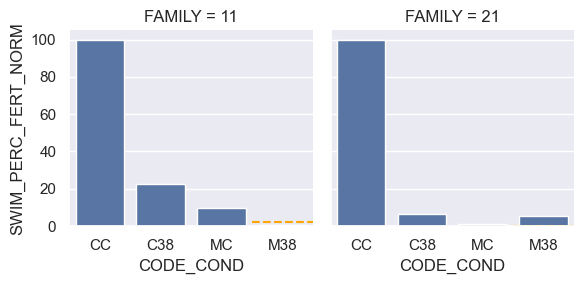

In [28]:
g = sns.FacetGrid(exp5fac[(exp5fac['FAMILY'] == '11') | (exp5fac['FAMILY'] == '21')], col="FAMILY")
g.map(sns.barplot, 'CODE_COND', 'SWIM_PERC_FERT_NORM', order=['CC', 'C38', 'MC', 'M38'])

ax1, ax2 = g.axes[0]
ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_21, xmin=0.75, ls='--', color='orange')
;

In [29]:
exp_11_common = exp5fac[exp5fac['CODE'] == '11C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '11MC'].SWIM_PERC_FERT.mean() / 100
exp_12_common = exp5fac[exp5fac['CODE'] == '12C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '12MC'].SWIM_PERC_FERT.mean() / 100
exp_21_common = exp5fac[exp5fac['CODE'] == '21C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '21MC'].SWIM_PERC_FERT.mean() / 100
exp_22_common = exp5fac[exp5fac['CODE'] == '22C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '22MC'].SWIM_PERC_FERT.mean() / 100

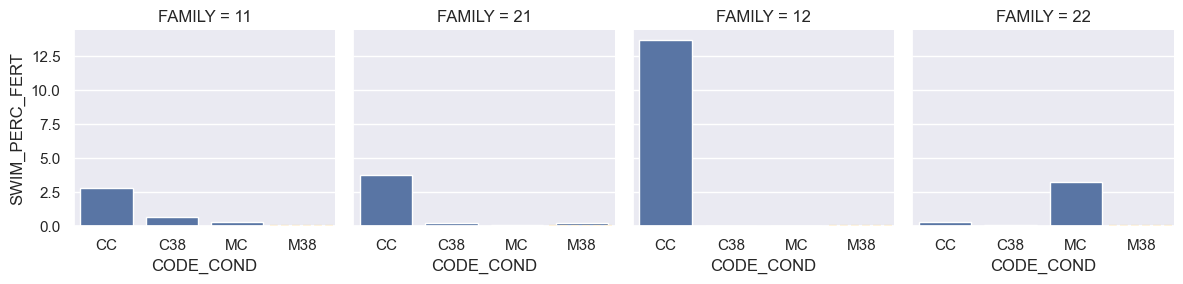

In [30]:
g = sns.FacetGrid(exp5fac, col="FAMILY")
g.map(sns.barplot, 'CODE_COND', 'SWIM_PERC_FERT', order=['CC', 'C38', 'MC', 'M38'])

ax1, ax2, ax3, ax4 = g.axes[0]
ax1.axhline(exp_11_common, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12_common, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21_common, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22_common, xmin=0.75, ls='--', color='orange');

# EXP 8 main factory

In [31]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_8_second_main_factory'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp8fac = pd.read_csv(url)

In [32]:
exp8fac.TEMP = exp8fac.TEMP.astype(str)

exp8fac.FERT_PERC = exp8fac.FERT_PERC.str.replace(',', '.')
exp8fac.FERT_PERC = pd.to_numeric(exp8fac.FERT_PERC)

exp8fac.SWIM_PERC_FERT = exp8fac.SWIM_PERC_FERT.str.replace(',', '.')
exp8fac.SWIM_PERC_FERT = pd.to_numeric(exp8fac.SWIM_PERC_FERT)

exp8fac.SWIM_PERC_FERT_NORM = exp8fac.SWIM_PERC_FERT_NORM.str.replace(',', '.')
exp8fac.SWIM_PERC_FERT_NORM = pd.to_numeric(exp8fac.SWIM_PERC_FERT_NORM)

In [33]:
exp8fac = exp8fac.iloc[9:13,]

In [34]:
exp8fac

,№,CODE,MUT,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,TOTAL_SAMPLE,FERT.1,FERT_PERC,SWIM_PERC_FERT,SWIM_PERC_TOTAL,SWIM,SWIM_PERC_FERT_NORM,SWIM_PERC_TOTAL_NORM
9,NaN,CC,C,nan,0,NaN,NaN,NaN,629244.0,NaN,274053.0,43.552805,43.787085,"19,07050365",120000.0,100.000000,100
10,NaN,C38,C,38.0,40,NaN,NaN,NaN,629244.0,NaN,274053.0,43.552805,31.745636,"13,82611515",87000.0,72.500000,"72,5"
11,NaN,MC,M,nan,0,NaN,NaN,NaN,629244.0,NaN,339140.0,53.896430,11.794537,"6,356834551",40000.0,26.936110,"33,33333333"
12,NaN,M38,M,38.0,40,NaN,NaN,NaN,629244.0,NaN,339140.0,53.896430,2.358907,"1,27136691",8000.0,5.387222,"6,666666667"


In [35]:
exp8fac['CODE_COND'] = exp8fac.CODE.str.replace('1', '').str.replace('2', '')

### FIND OUTLIERS

In [36]:
find_outliers_IQR(exp8fac['FERT.1'])

Series([], Name: FERT.1, dtype: float64)

In [37]:
find_outliers_IQR(exp8fac['FERT_PERC'])

Series([], Name: FERT_PERC, dtype: float64)

In [38]:
find_outliers_IQR(exp8fac['SWIM'])

Series([], Name: SWIM, dtype: float64)

In [39]:
find_outliers_IQR(exp8fac['SWIM_PERC_FERT'])

Series([], Name: SWIM_PERC_FERT, dtype: float64)

<AxesSubplot: >

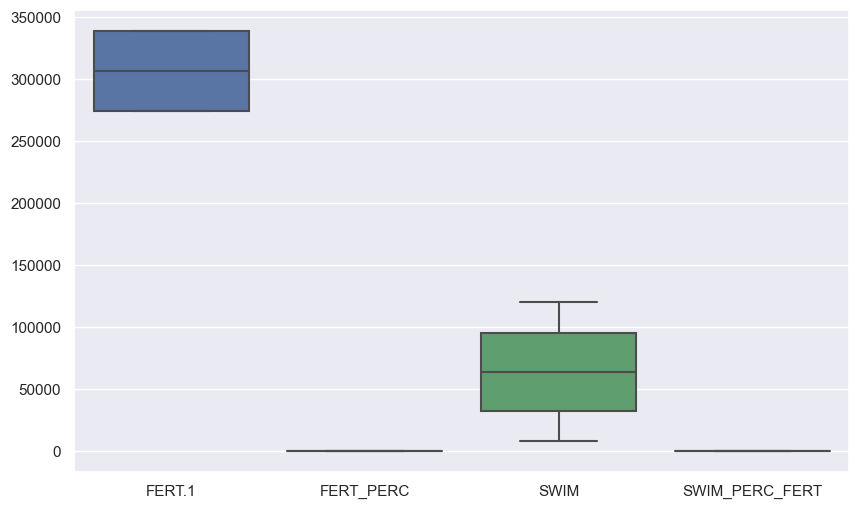

In [40]:
sns.boxplot(exp8fac[['FERT.1', 'FERT_PERC', 'SWIM', 'SWIM_PERC_FERT']])

### DRAW PLOT

In [41]:
expected_8 = exp8fac[exp8fac['CODE_COND'] == 'C38'].SWIM_PERC_FERT_NORM.mean() * exp8fac[exp8fac['CODE_COND'] == 'MC'].SWIM_PERC_FERT_NORM.mean() / 100

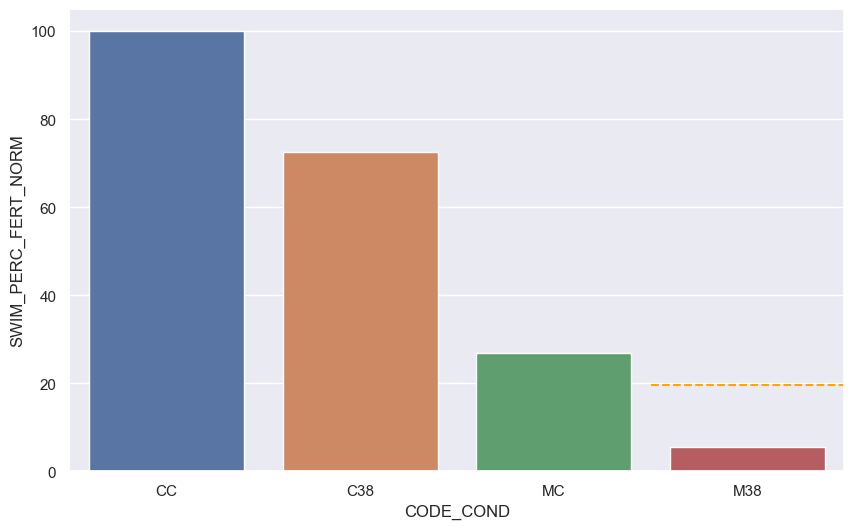

In [42]:
sns.barplot(exp8fac, x='CODE_COND', y='SWIM_PERC_FERT_NORM')
plt.axhline(y=expected_8, xmin=0.75, color='orange', ls='--') 

# EXP 5 POUNDS

In [43]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = '5_POUNDS'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
pounds = pd.read_csv(url)

In [44]:
pounds

,Pound,Family,Mode,Type,Count,Weight(g),AVG_weight(g)
0,1,1x1,Control,Crasus,10,280,28
1,1,1x1,Control,Crasus,8,220,"27,5"
2,1,1x1,Control,Crasus,10,200,20
3,1,1x1,Control,Scattered,10,380,38
4,1,1x1,Control,Scattered,9,360,40
5,1,1x1,Control,Scattered,10,440,44
6,1,1x1,Control,Scattered,10,440,44
7,1,1x1,Control,Naked,12,400,"33,33333333"
8,1,1x1,Control,Naked,10,400,40
9,1,1x1,Control,Naked,10,340,34


In [45]:
pounds = pounds.rename(columns={"AVG_weight(g)": "AVG_weight"})

In [46]:
pounds['AVG_weight'] = pounds['AVG_weight'].str.replace(',', '.')
pounds['AVG_weight'] = pd.to_numeric(pounds['AVG_weight'])

In [47]:
pounds_fish = pd.DataFrame()

for row in pounds.index:
    for _ in range(pounds.iloc[row, 4]):
        pounds_fish = pounds_fish.append(pounds.iloc[row, ])
        
pounds_fish

/var/folders/lr/tz5w155s1wv9t8nfchl8bm700000gn/T/ipykernel_29932/747853023.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pounds_fish = pounds_fish.append(pounds.iloc[row, ])
/var/folders/lr/tz5w155s1wv9t8nfchl8bm700000gn/T/ipykernel_29932/747853023.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pounds_fish = pounds_fish.append(pounds.iloc[row, ])
/var/folders/lr/tz5w155s1wv9t8nfchl8bm700000gn/T/ipykernel_29932/747853023.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pounds_fish = pounds_fish.append(pounds.iloc[row, ])
/var/folders/lr/tz5w155s1wv9t8nfchl8bm700000gn/T/ipykernel_29932/747853023.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

,Pound,Family,Mode,Type,Count,Weight(g),AVG_weight
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
...,...,...,...,...,...,...,...
22,4,2x1,Shock,Scattered,3,100,33.333333
23,4,2x1,Shock,Naked,4,80,20.000000
23,4,2x1,Shock,Naked,4,80,20.000000
23,4,2x1,Shock,Naked,4,80,20.000000


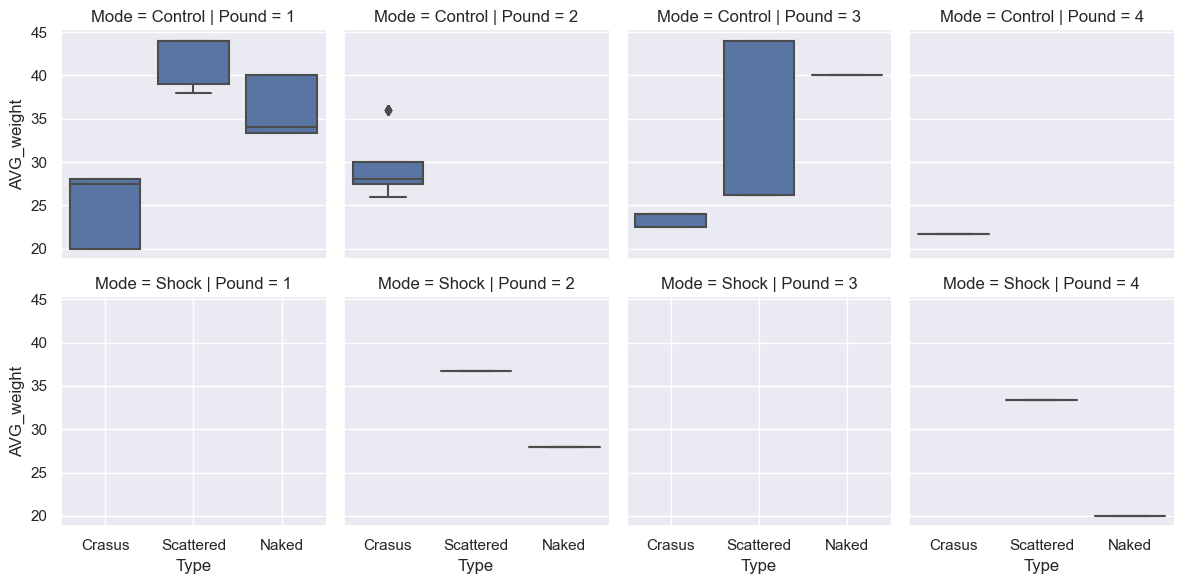

In [48]:
g = sns.FacetGrid(pounds_fish, col="Pound", row='Mode')
g.map(sns.boxplot, 'Type', 'AVG_weight', order=['Crasus', 'Scattered', 'Naked']);

In [49]:
pounds_fish

,Pound,Family,Mode,Type,Count,Weight(g),AVG_weight
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
...,...,...,...,...,...,...,...
22,4,2x1,Shock,Scattered,3,100,33.333333
23,4,2x1,Shock,Naked,4,80,20.000000
23,4,2x1,Shock,Naked,4,80,20.000000
23,4,2x1,Shock,Naked,4,80,20.000000


In [51]:
st_mean_a = pounds_fish.AVG_weight.mean()
st_mean_g = st.gmean(pounds_fish.AVG_weight)
print(f'arithmetic_mean: {st_mean_a}', f'geometric_mean: {st_mean_g}', sep='\n')

arithmetic_mean: 31.946902654690266
geometric_mean: 31.020306869959647


In [50]:
# Performing n-way ANOVA
model = ols('AVG_weight ~ Family + Mode + Type + Family:Mode + Family:Type + Mode:Type + Family:Mode:Type', data=pounds_fish).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,51976.470588,1.0,3040.721414,3.087951e-129
Family,516.334534,1.0,30.206543,1.089478e-07
Mode,482.664717,1.0,28.236795,2.666959e-07
Type,4992.069647,2.0,146.022738,7.647608e-41
Family:Mode,62.743567,1.0,3.670617,5.670001e-02
Family:Type,783.915773,2.0,22.930275,9.320455e-10
Mode:Type,566.394994,2.0,16.567587,2.023113e-07
Family:Mode:Type,356.710452,2.0,10.434117,4.723550e-05
Residual,3692.188833,216.0,NaN,NaN


<AxesSubplot: xlabel='Family', ylabel='AVG_weight'>

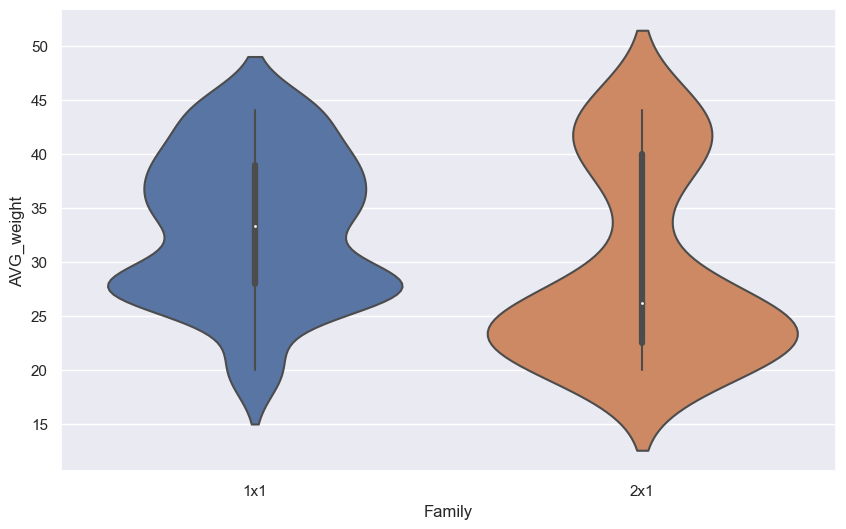

In [52]:
sns.violinplot(data=pounds_fish, x='Family', y='AVG_weight')

<AxesSubplot: xlabel='Mode', ylabel='AVG_weight'>

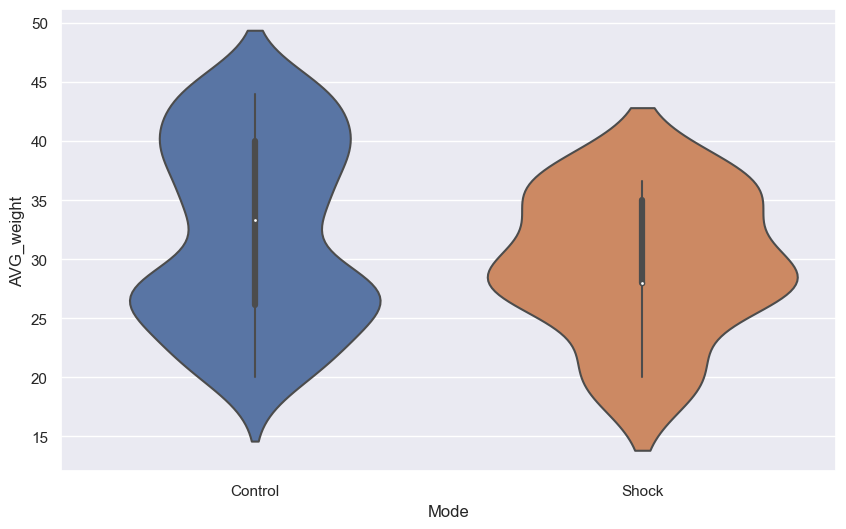

In [53]:
sns.violinplot(data=pounds_fish, x='Mode', y='AVG_weight')

<AxesSubplot: xlabel='Pound', ylabel='AVG_weight'>

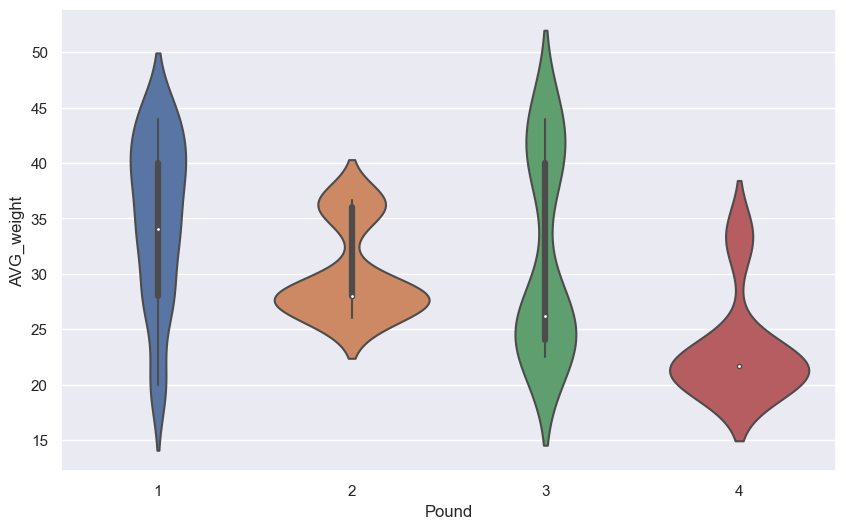

In [54]:
sns.violinplot(data=pounds_fish, x='Pound', y='AVG_weight')

<AxesSubplot: xlabel='Type', ylabel='AVG_weight'>

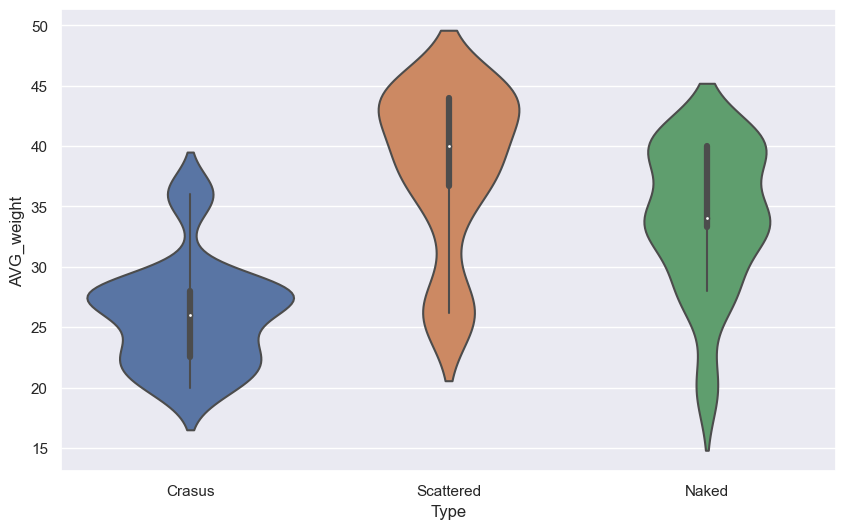

In [55]:
sns.violinplot(data=pounds_fish, x='Type', y='AVG_weight')

# CARP TEST

In [56]:
sheet_id = '1PfTcSHiV41sq4wYnsyVVUBA5E1H92xgg2EeCqn8pYik'
sheet_name = 'main'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
carp_test = pd.read_csv(url)

In [58]:
carp_test

,Carp,N,Eggs,L,L_without_C,Eye,h_head,h_body
0,2_K_1_enu_control,1,10,NaN,NaN,1,1.2,1.0
1,2_K_1_enu_control,2,1,6.5,NaN,2,1.2,1.0
2,2_K_1_enu_control,3,0,NaN,4.6,3,NaN,1.0
3,2_K_1_enu_control,4,13,6.7,NaN,4,1.3,1.0
4,2_K_1_enu_control,5,0,6.2,4.5,5,NaN,1.0
...,...,...,...,...,...,...,...,...
519,2x1C2,520,0,3.6,NaN,520,NaN,NaN
520,2x1C2,521,0,3.8,3.4,521,NaN,NaN
521,2x1C2,522,0,3.2,2.6,522,NaN,NaN
522,2x1C2,523,0,4.6,3.8,523,NaN,NaN
